In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import scatterplot_solution_1, scatterplot_solution_2

In [4]:
fuel_econ = pd.read_csv("./data/fuel_econ.csv")
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


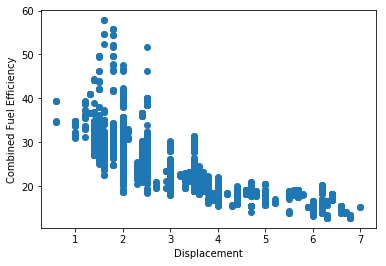

In [8]:
plt.scatter(data=fuel_econ, x="displ", y="comb"); 
plt.xlabel("Displacement"); 
plt.ylabel("Combined Fuel Efficiency"); 

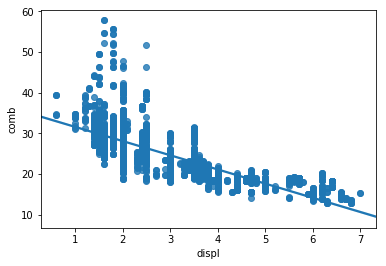

In [9]:
sb.regplot(data=fuel_econ, x ='displ', y = 'comb'); 


## Overplotting, Overplotting, Transparency, and Jitter

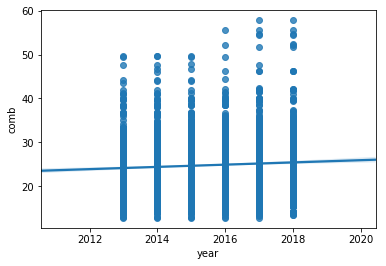

In [10]:
sb.regplot(data=fuel_econ, x ='year', y = 'comb');

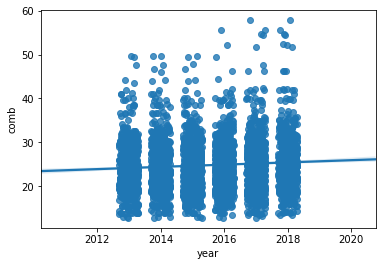

In [12]:
# Jitter 

sb.regplot(data=fuel_econ, x ='year', y = 'comb', x_jitter=0.3); 

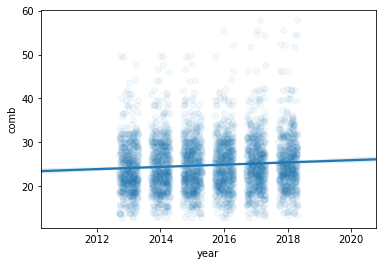

In [14]:
# Jitter 

sb.regplot(data=fuel_econ, x ='year', y = 'comb', x_jitter=0.3, scatter_kws = {'alpha': 1/20}); 

## Heat Maps
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d function.

### Original Plot using Jitter and Transparency 

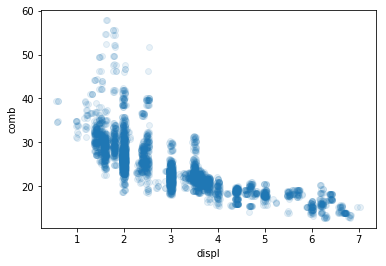

In [16]:
sb.regplot(data=fuel_econ, x ='displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha': 1/10}, fit_reg=False); 

### Comparison using heatmap 

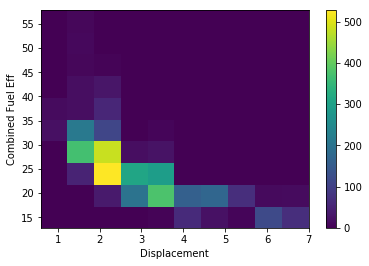

In [17]:
plt.hist2d(data=fuel_econ, x ='displ', y = 'comb');
plt.colorbar(); #for legend
plt.xlabel("Displacement");
plt.ylabel("Combined Fuel Eff");

### Improvement -- Set minimum count before area can be colored w/ cmin

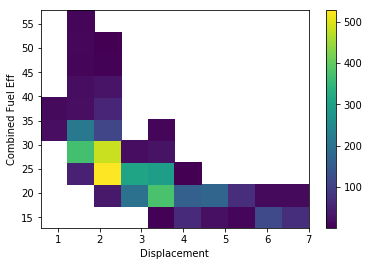

In [18]:
plt.hist2d(data=fuel_econ, x ='displ', y = 'comb', cmin=0.5);
plt.colorbar(); #for legend
plt.xlabel("Displacement");
plt.ylabel("Combined Fuel Eff");

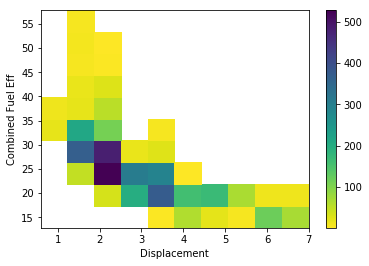

In [20]:
# reverse color map since light (white) means fewer
plt.hist2d(data=fuel_econ, x ='displ', y = 'comb', cmin=0.5, cmap='viridis_r');
plt.colorbar(); #for legend
plt.xlabel("Displacement");
plt.ylabel("Combined Fuel Eff");

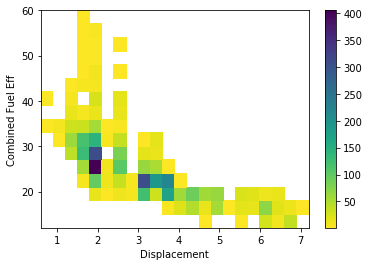

In [21]:
# Change bin sizes 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x ='displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar(); #for legend
plt.xlabel("Displacement");
plt.ylabel("Combined Fuel Eff");

### Adding Counts to Heatmap
If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

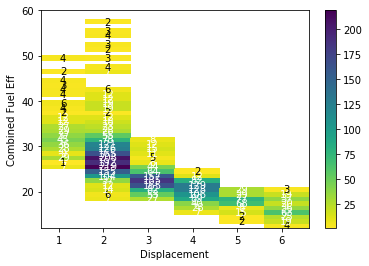

In [24]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data=fuel_econ, x ='displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar(); #for legend
plt.xlabel("Displacement");
plt.ylabel("Combined Fuel Eff");
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')